In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib

In [5]:
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

Time series analysis and forecasting for furniture sales.

In [46]:
df = pd.read_excel('Superstore.xls')
furniture = df.loc[df['Category']=='Furniture']

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [47]:
furniture.sample(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9476,9477,CA-2016-100818,2016-05-31,2016-06-05,Second Class,JM-15265,Janet Molinari,Corporate,United States,Chicago,...,60653.0,Central,FUR-FU-10002703,Furniture,Furnishings,"Tenex Traditional Chairmats for Hard Floors, A...",51.560,2,0.6,-61.8720
8504,8505,CA-2017-109400,2017-05-02,2017-05-06,Standard Class,NR-18550,Nick Radford,Consumer,United States,Amarillo,...,79109.0,Central,FUR-CH-10003298,Furniture,Chairs,Office Star - Contemporary Task Swivel chair w...,366.744,4,0.3,-110.0232
4940,4941,CA-2016-156482,2016-02-06,2016-02-13,Standard Class,IL-15100,Ivan Liston,Consumer,United States,Wilmington,...,19805.0,East,FUR-CH-10001708,Furniture,Chairs,Office Star - Contemporary Swivel Chair with P...,1268.820,9,0.0,266.4522


In [48]:
furniture.shape

(2121, 21)

In [49]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2015-01-06 00:00:00'), Timestamp('2018-12-30 00:00:00'))

### Data Preprocessing

Removing columns, check missing values, aggregate sales by date, and so on.

In [50]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category','Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)
furniture = furniture.sort_values('Order Date')

In [51]:
furniture.columns

Index(['Order Date', 'Sales'], dtype='object')

In [52]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [53]:
furniture = furniture.groupby(['Order Date'])['Sales'].sum()

In [59]:
furniture.reset_index()

,Order Date,Sales
0,2015-01-06,2573.8200
1,2015-01-07,76.7280
2,2015-01-10,51.9400
3,2015-01-11,9.9400
4,2015-01-13,879.9390
5,2015-01-14,61.9600
6,2015-01-16,127.1040
7,2015-01-19,181.4700
8,2015-01-20,1413.5100
9,2015-01-21,25.2480


In [66]:
furniture

Order Date
2015-01-06    2573.8200
2015-01-07      76.7280
2015-01-10      51.9400
2015-01-11       9.9400
2015-01-13     879.9390
2015-01-14      61.9600
2015-01-16     127.1040
2015-01-19     181.4700
2015-01-20    1413.5100
2015-01-21      25.2480
2015-01-26     217.2000
2015-01-27     333.0000
2015-01-31     290.6660
2015-02-08      14.5600
2015-02-11    1650.0500
2015-02-12     129.5680
2015-02-18      25.1600
2015-02-20      20.3200
2015-03-01    1893.9950
2015-03-03     928.8020
2015-03-07     966.9840
2015-03-11       8.3200
2015-03-14    1139.9200
2015-03-15      45.6960
2015-03-17    3265.2300
2015-03-18    1462.4500
2015-03-19      25.0080
2015-03-21     251.3280
2015-03-22     314.3520
2015-03-24      40.4800
                ...    
2018-11-26    1375.6000
2018-11-27      65.7800
2018-11-28    4659.1400
2018-11-29     491.8880
2018-11-30    4129.7280
2018-12-01    2542.2920
2018-12-02    3527.5040
2018-12-03     591.8400
2018-12-04     992.7820
2018-12-05     321.4800
2018-

### Indexing with Time Series Data

In [68]:
#furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2015-01-06', '2015-01-07', '2015-01-10', '2015-01-11',
               '2015-01-13', '2015-01-14', '2015-01-16', '2015-01-19',
               '2015-01-20', '2015-01-21',
               ...
               '2018-12-18', '2018-12-19', '2018-12-21', '2018-12-22',
               '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

We will use the average daily sales value for a month, and we are using the start of each month as a timestamp.

In [69]:
y = furniture.resample('MS').mean()

In [71]:
y['2018':]

Order Date
2018-01-01     397.602133
2018-02-01     528.179800
2018-03-01     544.672240
2018-04-01     453.297905
2018-05-01     678.302328
2018-06-01     826.460291
2018-07-01     562.524857
2018-08-01     857.881889
2018-09-01    1209.508583
2018-10-01     875.362728
2018-11-01    1277.817759
2018-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

### Visualizing Furniture Sales Time Series Data

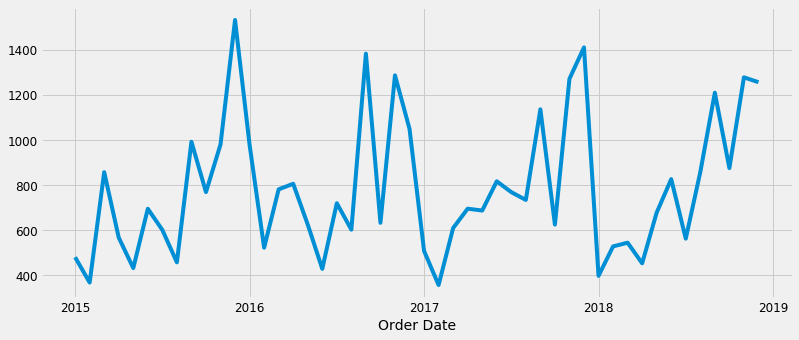

In [73]:
y.plot(figsize=(12,5))
plt.show()

Pattern:  
seasonality - sales are low at the beginning of the year and high at the end of the year 

We can also visualize data using method called time-series decomposition that allows us to decompose our time series into three distinct components:  
- trend
- seasonality 
- noise 

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,6

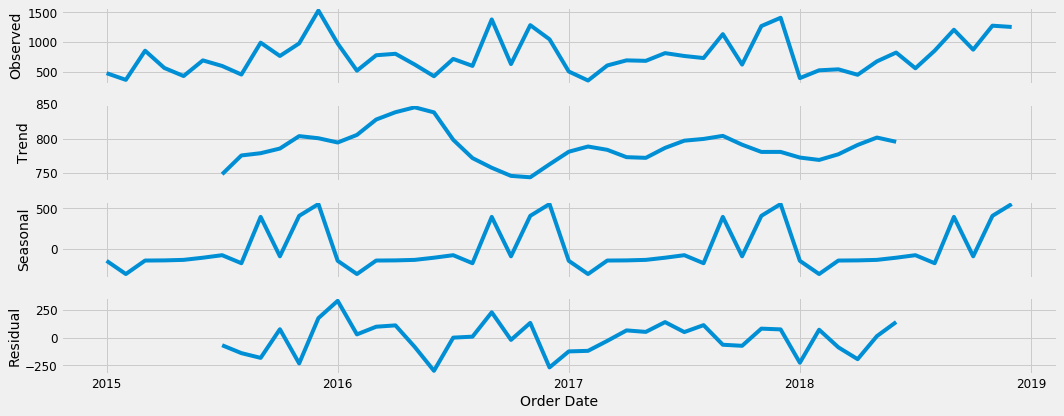

In [75]:
decomposition = sm.tsa.seasonal_decompose(y,model='additive')
fig = decomposition.plot()
plt.show()

Sales of furniture are unstable, the seasonality is visible.

### Time series forecasting with ARIMA

**ARIMA** - Autoregressive Integrated Moving Average - oe of the most commonly used methods for time series forecasting.  
Model is denoted ARIMA(p,d,q), with parameters for seasonality, trend, and noise.

In [76]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [77]:
print('Examples of parameter combinations for seasonal ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### Selection for furnitue's sales ARIMA Time Series Model

Use grid search to find the optimal set of parameters that yields the best performance for the model.

In [78]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1446.5593245884702

C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365


C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1172.2086741447833
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.92522707581
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091255
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.5929815918467


C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2513.139467221268
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946867
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944


C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1250.256448915547
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6378567198382
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073


C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1550.2028470024434
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:649.9056176817193
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2626.6969858049224
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:458.8705548482836
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:486.1832977442613
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2500.937327525841
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:310.75743684172716
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:692.1645522067712


C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1442.9450066127697
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:479.46321478521355
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:480.9259367935204


C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1265.3041082790207
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:304.46646750845906
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:665.7794442186656
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:82073.66352065685
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:468.3685195815077
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:482.57633238767863
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:nan
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:306.0156002130368
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:671.2513547541902
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1388.9536686999006
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.2003422281134
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:475.3403658784957


C:\Users\Gosia\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1322.3326479713248
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:300.627090134543
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:649.0318019835554
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:101786.44160210453
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:460.47626876096086
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:469.5250354660887
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2563.267567779531
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:297.78754395330014


The above suggests that `SARIMAX(1,1,1)x(1,1,0,12)` yields the lowest AIC value of 297.78. Therefore this is to be considered an optimal option. 

### Fitting the ARIMA model

In [79]:
mod = sm.tsa.statespace.SARIMAX(y,order=(1,1,1),seasonal_order=(1,1,0,12), enforce_stationarity=False, enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


Model diagnostics to investigate any unusual behaviour:

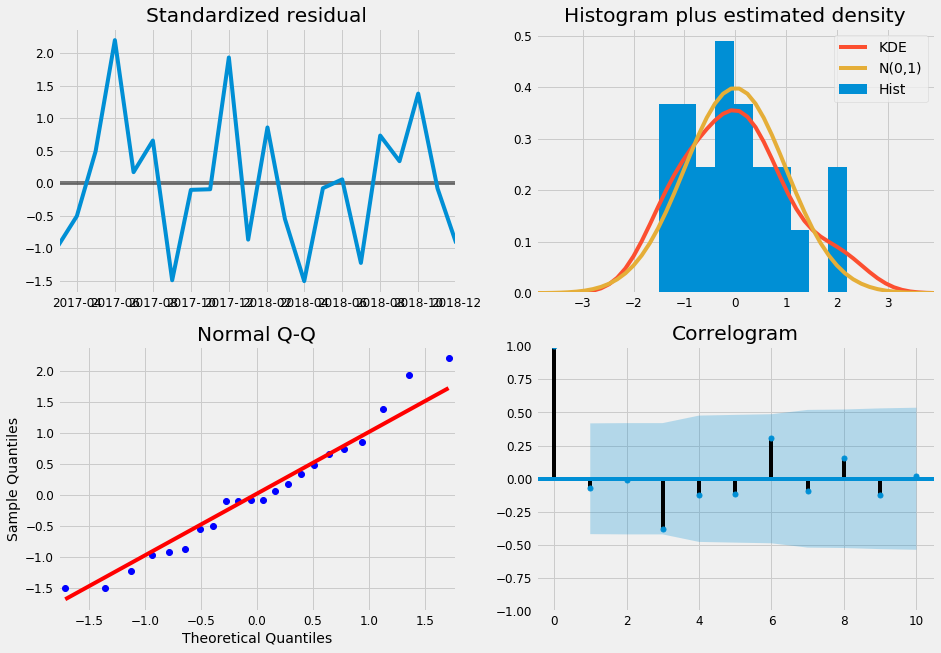

In [84]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

Model residuals are nearly normally distributed.

### Validating forecasts

Compare predicted sales to real sales of the time series.

In [111]:
pred = results.get_prediction(start=pd.to_datetime('2018-01-01'),dynamic=False)
pred_ci = pred.conf_int()
pred
pred_ci

,lower Sales,upper Sales
Order Date,,
2018-01-01,204.675887,895.517778
2018-02-01,31.859888,721.913192
2018-03-01,296.215945,985.551781
2018-04-01,373.138257,1061.818538
2018-05-01,347.351801,1035.430756
2018-06-01,471.969392,1159.494789
2018-07-01,433.445518,1120.459649
2018-08-01,385.912617,1072.453104
2018-09-01,806.828477,1492.928940


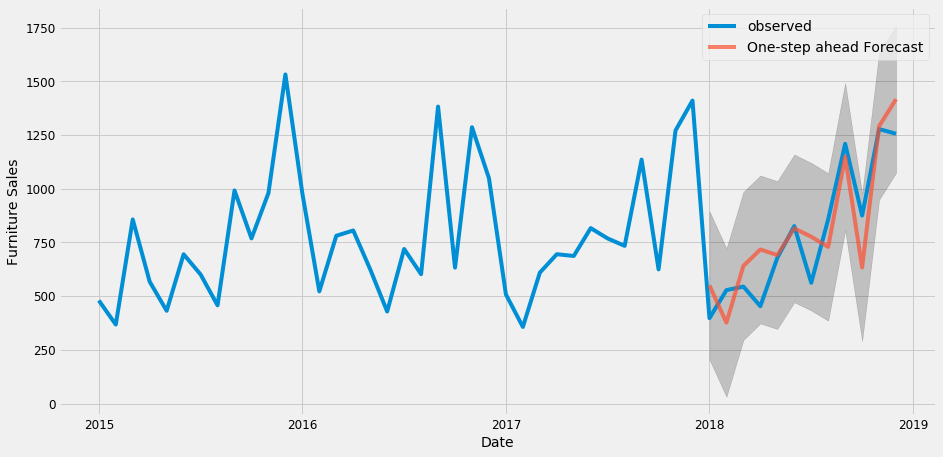

In [98]:
ax = y['2015':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label = 'One-step ahead Forecast', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, forcasts align with the true values very well, showing an upward trend starts from the beginning of the year and captures the seasonality toward the end of the year. 

### Mean Squared Error

**MSE** - Mean Squared Error - of an estimator measures the average of the squares of the errors, that is the difference between the estimated values and the true values. **MSE** is the measure of the quality of an estimator, **non-negative**, the smaller the MSE the closer the estimations are to the best fit.

In [89]:
y_forecasted = pred.predicted_mean
y_truth = y['2018-01-01':]

In [90]:
mse = ((y_forecasted-y_truth)**2).mean()
print('The Mean Squared Error of forecasts is {}'.format(round(mse,2)))

The Mean Squared Error of forecasts is 22993.57


### Root Mean Squared Error

**RMSE** - Root Mean Squared Error

In [91]:
print('The Root Mean Squared Error of the forecasts is {}'.format(round(np.sqrt(mse),2)))

The Root Mean Squared Error of the forecasts is 151.64


### Producing and visualizing forecasts

In [123]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
#pred_uc, pred_ci

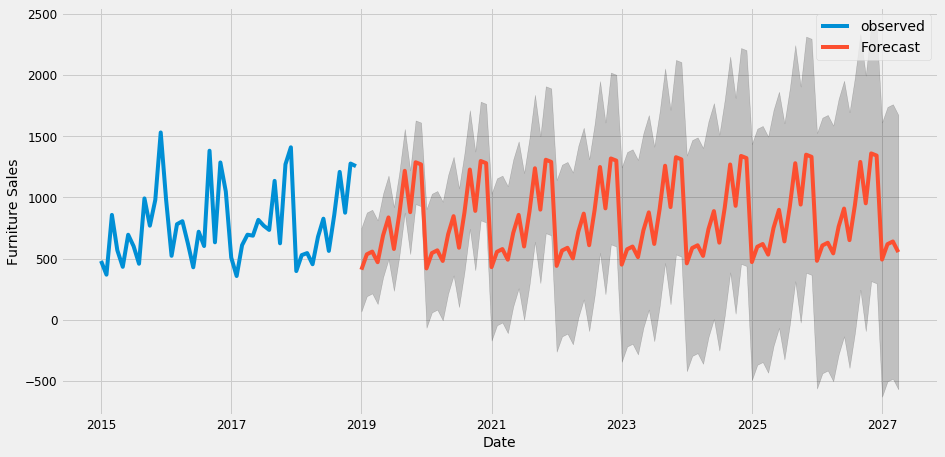

In [125]:
ax = y.plot(label='observed',figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label = 'Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=0.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

The model captured the furniture sales seasonality. As we forecast further into the future it is natural to become less confident in values. This is reflected by the confidence intervals generated by the model, which grow larger as we move further out into the future. 

### Time series of Furniture vs. Office Supplies

In [126]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

### Data Exploration

Compare two categories' sales in the same time period. Combine two dataframes into one and plot time series into one plot.

In [127]:
cols =  ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category','Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols,axis=1,inplace=True)
office.drop(cols,axis=1,inplace=True)

In [128]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

In [129]:
furniture = furniture.groupby('Order Date')['Sales'].sum()
office = office.groupby('Order Date')['Sales'].sum()

In [132]:
y_furniture = furniture.resample('MS').mean()
y_office = office.resample('MS').mean()

In [133]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date':y_office.index, 'Sales':y_office.values})

In [134]:
store = furniture.merge(office,how='inner', on='Order Date')
store.rename(columns={'Sales_x':'furniture_sales', 'Sales_y':'office_sales'},inplace= True)
store.head()

,Order Date,furniture_sales,office_sales
0,2015-01-01,480.194231,285.357647
1,2015-02-01,367.931600,63.042588
2,2015-03-01,857.291529,391.176318
3,2015-04-01,567.488357,464.794750
4,2015-05-01,432.049188,324.346545


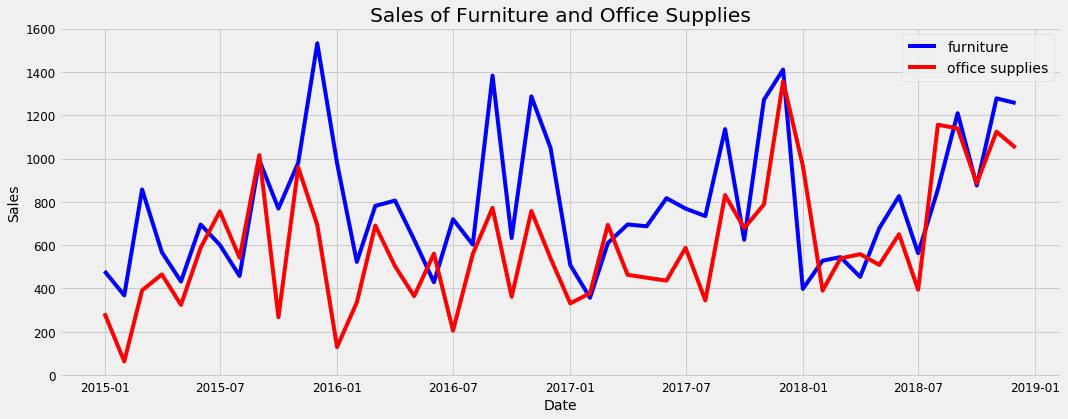

In [136]:
plt.figure(figsize=(16,6))
plt.plot(store['Order Date'],store['furniture_sales'],'b-',label='furniture')
plt.plot(store['Order Date'],store['office_sales'],'r-',label='office supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend()
plt.show()

Sales of furniture and office supplies share a similar seasonal pattern. Early of the year is the off season for both categories. It seems summer time is quiet for office suppiels too. The average daily sales of furniture are higher than those of office supplies in most of the months. It is understandable as the value of furniture should be much higher than those of office supplies. Occasinally, the office supplies passed furniture on average daily sales. Let's find out when was the first timeoffice supplies sales surpassed those of furniture's.

In [137]:
first_date = store.ix[np.min(list(np.where(store['office_sales']>store['furniture_sales'])[0])),'Order Date']
print('Office supplies first time produced higher sales than furniture is {}'.format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2015-07-01


### Time series modeling with Prophet

**Prophet** - forecasting tool released by Facebook in 2017, designed for analyzing time-series that display patterens on different time scales such as yearly, weekly, daily; it has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. 

In [140]:
from fbprophet import Prophet

In [141]:
furniture = furniture.rename(columns={'Order Date':'ds','Sales':'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [147]:
office = office.rename(columns={'Order Date':'ds','Sales':'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [143]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36,freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

In [148]:
office_forecast = office_model.make_future_dataframe(periods=36,freq='MS')
office_forecast = office_model.predict(office_forecast)

Text(0.5,1,'Furniture Sales')

<Figure size 1152x432 with 0 Axes>

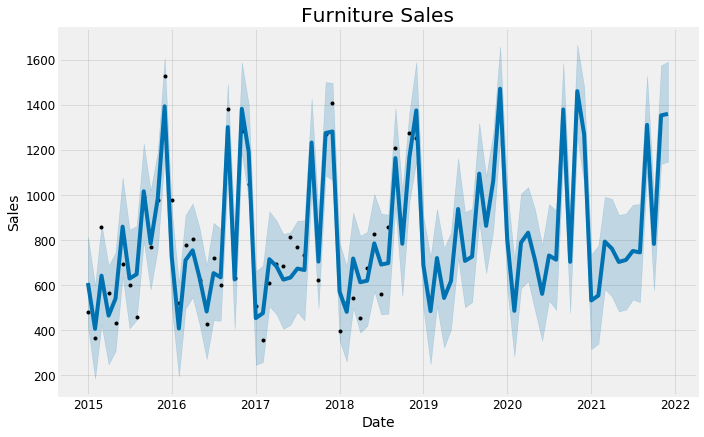

In [145]:
plt.figure(figsize=(16,6))
furniture_model.plot(furniture_forecast,xlabel='Date',ylabel='Sales')
plt.title('Furniture Sales')

Text(0.5,1,'Office Supplies Sales')

<Figure size 1152x432 with 0 Axes>

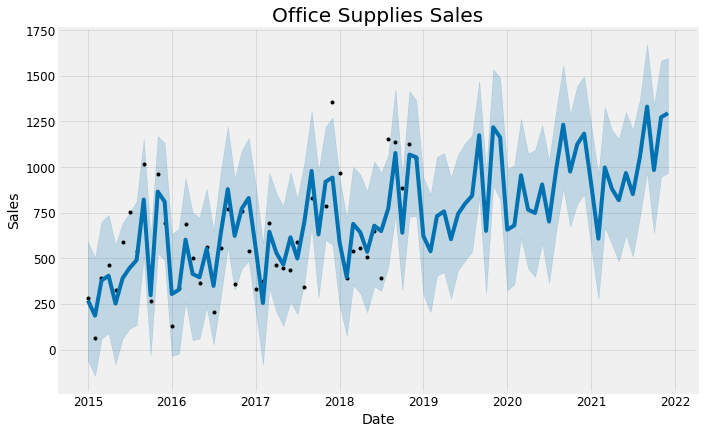

In [149]:
plt.figure(figsize=(16,6))
office_model.plot(office_forecast,xlabel='Date',ylabel='Sales')
plt.title('Office Supplies Sales')

### Compare forecasts

We already have the forecasts for three years for these two categories into future. We will noe join them together to compare their future forecasts.

In [150]:
furniture_names = ['furniture_%s' % column for column in furniture_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]

In [151]:
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

In [152]:
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

In [153]:
forecast = pd.merge(merge_furniture_forecast,merge_office_forecast,how='inner',left_on='furniture_ds', right_on='office_ds')

In [154]:
forecast = forecast.rename(columns={'furniture_ds':'Date'}).drop('office_ds',axis=1)

In [155]:
forecast.head()

,Date,furniture_trend,furniture_yhat_lower,furniture_yhat_upper,furniture_trend_lower,furniture_trend_upper,furniture_additive_terms,furniture_additive_terms_lower,furniture_additive_terms_upper,furniture_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2015-01-01,737.442886,417.448734,816.069614,737.442886,737.442886,-126.834379,-126.834379,-126.834379,-126.834379,...,-187.487797,-187.487797,-187.487797,-187.487797,-187.487797,-187.487797,0.0,0.0,0.0,269.137889
1,2015-02-01,739.106346,185.944435,599.449083,739.106346,739.106346,-331.842978,-331.842978,-331.842978,-331.842978,...,-278.220843,-278.220843,-278.220843,-278.220843,-278.220843,-278.220843,0.0,0.0,0.0,185.884543
2,2015-03-01,740.608825,425.232548,871.041328,740.608825,740.608825,-97.493813,-97.493813,-97.493813,-97.493813,...,-92.104978,-92.104978,-92.104978,-92.104978,-92.104978,-92.104978,0.0,0.0,0.0,378.756265
3,2015-04-01,742.272285,248.965063,686.877198,742.272285,742.272285,-276.534313,-276.534313,-276.534313,-276.534313,...,-73.556522,-73.556522,-73.556522,-73.556522,-73.556522,-73.556522,0.0,0.0,0.0,404.784421
4,2015-05-01,743.882084,307.922106,747.447771,743.882084,743.882084,-202.808152,-202.808152,-202.808152,-202.808152,...,-233.459025,-233.459025,-233.459025,-233.459025,-233.459025,-233.459025,0.0,0.0,0.0,252.120337


### Trend and Forecast Visualization

Text(0.5,1,'Furniture vs Office Supplies Sales Trend')

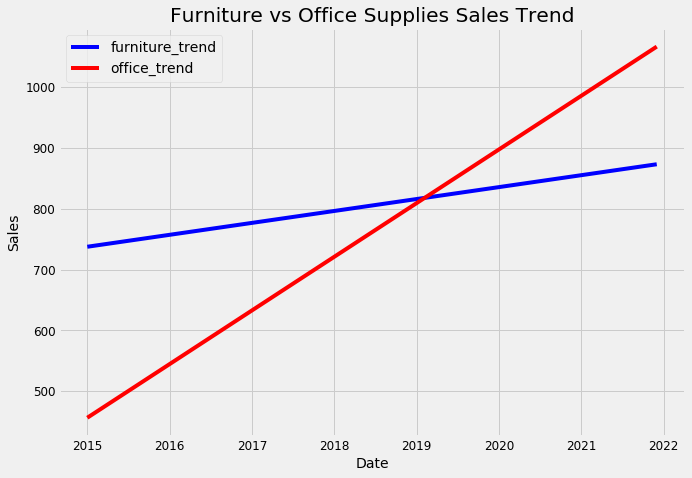

In [156]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'],forecast['furniture_trend'],'b-')
plt.plot(forecast['Date'],forecast['office_trend'],'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies Sales Trend')

Text(0.5,1,'Furniture vs Office Supplies Sales Estimate')

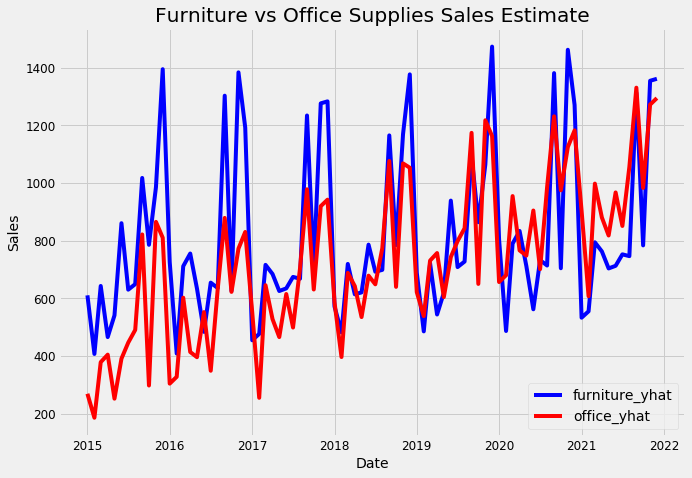

In [157]:
plt.figure(figsize=(10,7))
plt.plot(forecast['Date'],forecast['furniture_yhat'],'b-')
plt.plot(forecast['Date'],forecast['office_yhat'],'r-')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs Office Supplies Sales Estimate')

### Trends and Patterns

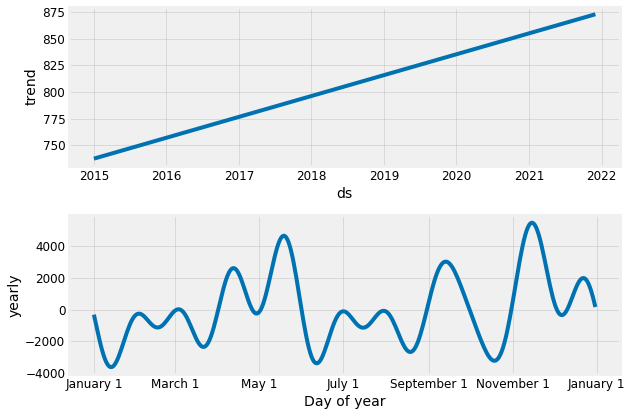

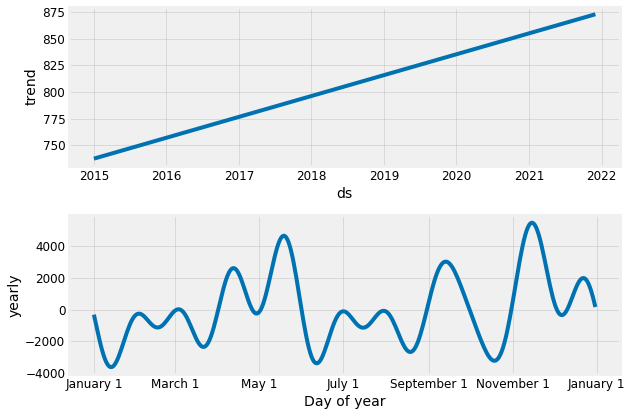

In [158]:
furniture_model.plot_components(furniture_forecast)

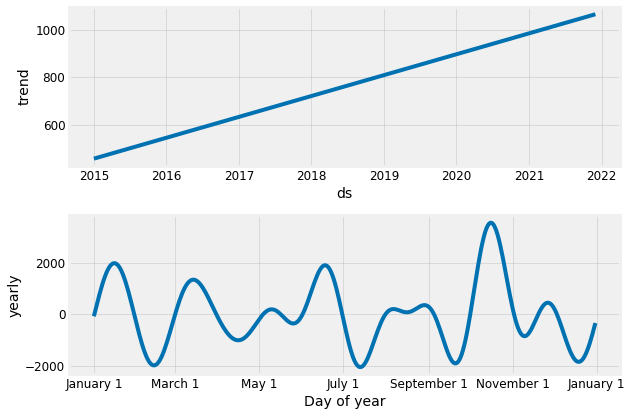

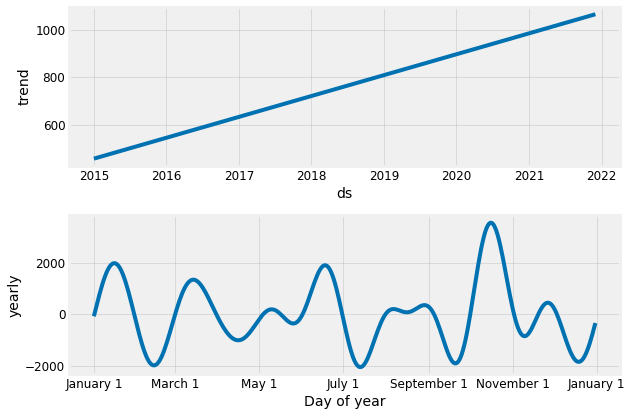

In [159]:
office_model.plot_components(office_forecast)

The sales for both furniture and office supplies have been lineary increasing over time and will be growing. Office supplies growth seems stronger.

The worst month for furniture is April, the worst month for office supplies is February.  
The best month for furniture is December, the best month for office supplies is October. 

There are many time series analysis to explore, such as forecast with uncertainty bounds, change point and anomaly detection, forecast time-series with external data source. 